### Time Series

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting.forecasting import plot_ys
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.forecasting.ets import AutoETS

import numpy as np


In [28]:
sktime.__version__

'0.4.2'

In [29]:
df = pd.read_csv('../data/covid_metrics_full_time.csv', index_col=0)

In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
12329,2020-10-12,Virginia,51,159570,3361
12330,2020-10-12,Washington,53,98265,2292
12331,2020-10-12,West Virginia,54,18281,385
12332,2020-10-12,Wisconsin,55,160655,1488


In [10]:
#df.set_index('date', inplace=True)

In [32]:
mis = df[df['state'] == 'Missouri']
mis.head()

,date,state,fips,cases,deaths
364,2020-03-07,Missouri,29,1,0
399,2020-03-08,Missouri,29,1,0
435,2020-03-09,Missouri,29,1,0
473,2020-03-10,Missouri,29,1,0
515,2020-03-11,Missouri,29,1,0


In [39]:
mis.reset_index(inplace=True)

In [40]:
y = mis['cases']

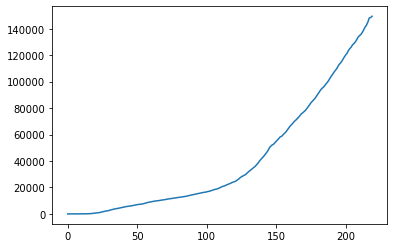

In [41]:
plt.plot(mis['cases'])

In [59]:
y_train, y_test = temporal_train_test_split(y, test_size=36)

In [60]:
y_train

0          1
1          1
2          1
3          1
4          1
       ...  
179    88974
180    90392
181    91994
182    93713
183    94923
Name: cases, Length: 184, dtype: int64

In [61]:
naive_model_last = NaiveForecaster(strategy='last')
naive_model_last.fit(y_train)
y_last_preds = naive_model_last.predict(list(range(1, len(y_test) +1)))

In [62]:
sarima = AutoARIMA(suppress_warnings=True)
sarima.fit(y_train)
y_sarima_preds = sarima.predict(np.arange(len(y_test) + 1))

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/pmdarima/arima/arima.py:560: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "


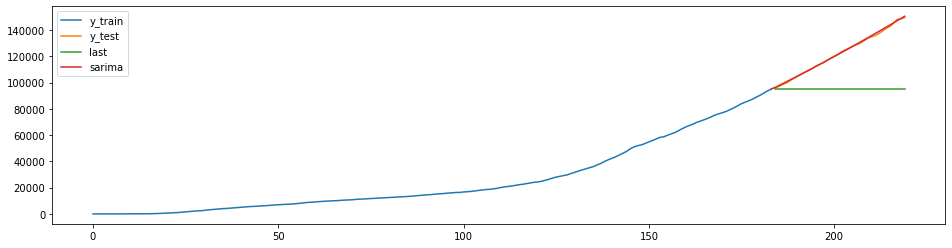

In [63]:
plot_ys(y_train, y_test, y_last_preds, y_sarima_preds, labels=['y_train', 'y_test', 'last', 'sarima']);
# Winning